In [1]:
import sys
sys.path.append('..')

import torch
import numpy as np

from IPython import display
import matplotlib
import matplotlib.pyplot as plt

from diffusion_policy.env.pusht.pusht_env import PushTEnv
from diffusion_policy.env.pusht.pusht_image_env import PushTImageEnv

/opt/anaconda3/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pygame 2.1.2 (SDL 2.0.18, Python 3.9.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = PushTImageEnv()

In [3]:
print(list(env.observation_space.keys()))
print(env.observation_space['agent_pos'].shape)
print(env.observation_space['image'].shape)

print(env.action_space)

['agent_pos', 'image']
(2,)
(3, 96, 96)
Box([0. 0.], [512. 512.], (2,), float64)


KeyboardInterrupt: 

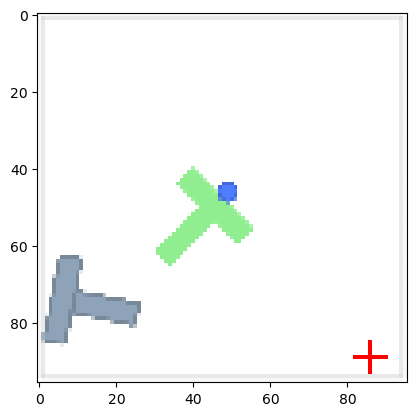

In [4]:
mode='rgb_array'

observation, _ = env.reset()
img = plt.imshow(env.render(mode))
episode_reward = 0
episode_steps = 0
done = False
while not done:
    img.set_data(env.render(mode))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()

    next_observation, reward, terminated, info = env.step(action)
    episode_reward += reward

    done = terminated
    episode_steps += 1
    observation = next_observation
print(episode_reward)